# 02_preprocessing - Data Cleaning and Preprocessing

This notebook demonstrates simple preprocessing steps using `src/preprocessing.py`. Each step is in its own cell for clarity.

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
import pandas as pd
from IPython.display import display

RAW_DIR = os.path.abspath(os.path.join('..', 'data', 'raw'))
CSV_LIST = [f for f in os.listdir(RAW_DIR) if f.lower().endswith('.csv')] if os.path.exists(RAW_DIR) else []
print('Found CSV files:', CSV_LIST)


Found CSV files: ['balanced_data.csv', 'cleaned_data.csv', 'SAML-D.csv', 'sample.csv']


In [2]:
# Load the balanced dataset from EDA notebook (if available), otherwise load raw dataset
balanced_path = os.path.join(RAW_DIR, 'cleaned_data.csv')

if os.path.exists(balanced_path):
    # Load balanced dataset from EDA notebook
    from load_data import load_dataset
    df = pd.read_csv(balanced_path)
    print(f'✅ Loaded BALANCED dataset from: {balanced_path}')
    print(f'   Dataset size: {len(df):,} rows')
    print(f'   Class distribution:')
    print(df['Is_laundering'].value_counts())
elif not CSV_LIST:
    print('No CSV in data/raw. Please add dataset file and re-run.')
else:
    # Fallback: load original raw dataset
    dataset_path = os.path.join(RAW_DIR, CSV_LIST[0])
    from load_data import load_dataset
    df = load_dataset(dataset_path)
    print(f'⚠️  Loaded UNBALANCED raw dataset: {CSV_LIST[0]}')
    print(f'   Run 01_EDA.ipynb first to create balanced_data.csv')
    print('\nLoaded into variable `df`.')


✅ Loaded BALANCED dataset from: c:\Users\mazen\Desktop\Uni\Term 9\Data Mining\Anti-Money Laundering (AML) Detection System\aml_project\data\raw\cleaned_data.csv
   Dataset size: 58,817 rows
   Class distribution:
Is_laundering
0    49219
1     9598
Name: count, dtype: int64


In [3]:
# Show first rows
try:
    display(df.head())
except NameError:
    print('`df` is not defined. Load the CSV first.')


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering
0,07:36:23,2023-02-20,5402012602,1511156942,4266.06,UK pounds,UK pounds,UK,UK,ACH,0
1,06:42:14,2023-03-07,8401844213,3742608142,10624.52,UK pounds,UK pounds,UK,UK,Debit card,0
2,10:06:13,2022-10-08,6465571183,8296980377,180.22,UK pounds,UK pounds,UK,UK,Credit card,0
3,16:43:42,2023-05-19,2612843052,960360534,13546.65,UK pounds,UK pounds,UK,UK,Cheque,0
4,15:08:57,2023-08-18,2818419843,7683774623,8790.08,Pakistani rupee,UK pounds,Nigeria,UK,Cross-border,1


In [4]:
# Show shape and columns
try:
    print('Shape:', df.shape)
    print('Columns:', df.columns.tolist())
except NameError:
    pass


Shape: (58817, 11)
Columns: ['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount', 'Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Is_laundering']


In [5]:
# DataFrame info
try:
    print(df.info())
except NameError:
    pass


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58817 entries, 0 to 58816
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    58817 non-null  object 
 1   Date                    58817 non-null  object 
 2   Sender_account          58817 non-null  int64  
 3   Receiver_account        58817 non-null  int64  
 4   Amount                  58817 non-null  float64
 5   Payment_currency        58817 non-null  object 
 6   Received_currency       58817 non-null  object 
 7   Sender_bank_location    58817 non-null  object 
 8   Receiver_bank_location  58817 non-null  object 
 9   Payment_type            58817 non-null  object 
 10  Is_laundering           58817 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 4.9+ MB
None


In [6]:
# Basic descriptive statistics
try:
    display(df.describe(include='all'))
except NameError:
    pass


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering
count,58817,58817,5.881700e+04,5.881700e+04,58817.000000,58817,58817,58817,58817,58817,58817.000000
unique,40095,321,NaN,NaN,NaN,13,13,18,18,7,NaN
top,17:32:48,2023-02-09,NaN,NaN,NaN,UK pounds,UK pounds,UK,UK,ACH,NaN
freq,7,250,NaN,NaN,NaN,55936,52410,56719,53184,11645,NaN
mean,NaN,NaN,5.037557e+09,5.008956e+09,9122.410163,NaN,NaN,NaN,NaN,NaN,0.163184
std,NaN,NaN,2.881216e+09,2.883052e+09,22590.077468,NaN,NaN,NaN,NaN,NaN,0.369537
min,NaN,NaN,9.217200e+04,9.217200e+04,5.450000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,2.567179e+09,2.509212e+09,2247.200000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,5.019040e+09,5.006738e+09,5995.690000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,7.533436e+09,7.508729e+09,10328.340000,NaN,NaN,NaN,NaN,NaN,0.000000


In [7]:
# Missing values and uniques
try:
    miss = df.isna().sum().sort_values(ascending=False)
    display(miss.head(20))
    uniques = df.nunique().sort_values()
    display(uniques.head(20))
except NameError:
    pass


Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
dtype: int64

Is_laundering                 2
Payment_type                  7
Payment_currency             13
Received_currency            13
Sender_bank_location         18
Receiver_bank_location       18
Date                        321
Sender_account            31910
Time                      40095
Receiver_account          45673
Amount                    57569
dtype: int64

In [8]:
# Drop Laundering_type column (keep only Is_laundering for binary classification)
if 'Laundering_type' in df.columns:
    df = df.drop(columns=['Laundering_type'])
    print('Dropped Laundering_type column')

# Preprocessing: run simple pipeline from src.preprocessing
from preprocessing import preprocess, save_cleaned

print('Before shape:', df.shape)
cleaned = preprocess(df, drop_thresh=0.6, date_col='Date', time_col='Time', save_path=os.path.abspath(os.path.join('..','data','processed','cleaned.csv')))
print('After shape:', cleaned.shape)


Before shape: (58817, 11)
After shape: (58817, 76)


In [9]:
# Show first rows of cleaned data
try:
    display(cleaned.head())
    print('Cleaned file saved to data/processed/cleaned.csv')
except NameError:
    print('No cleaned dataframe found. Run the preprocessing cell first.')


,Time,Date,Sender_account,Receiver_account,Amount,Is_laundering,timestamp,Payment_currency_Albanian lek,Payment_currency_Dirham,Payment_currency_Euro,...,Receiver_bank_location_UAE,Receiver_bank_location_UK,Receiver_bank_location_USA,Payment_type_ACH,Payment_type_Cash Deposit,Payment_type_Cash Withdrawal,Payment_type_Cheque,Payment_type_Credit card,Payment_type_Cross-border,Payment_type_Debit card
0,5387,136,5402012602,1511156942,4266.06,0,2023-02-20 07:36:23,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,4725,151,8401844213,3742608142,10624.52,0,2023-03-07 06:42:14,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,10308,1,6465571183,8296980377,180.22,0,2022-10-08 10:06:13,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,24742,224,2612843052,960360534,13546.65,0,2023-05-19 16:43:42,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,21388,315,2818419843,7683774623,8790.08,1,2023-08-18 15:08:57,False,False,False,...,False,True,False,False,False,False,False,False,True,False


Cleaned file saved to data/processed/cleaned.csv


Correlation matrix shape: (76, 76)


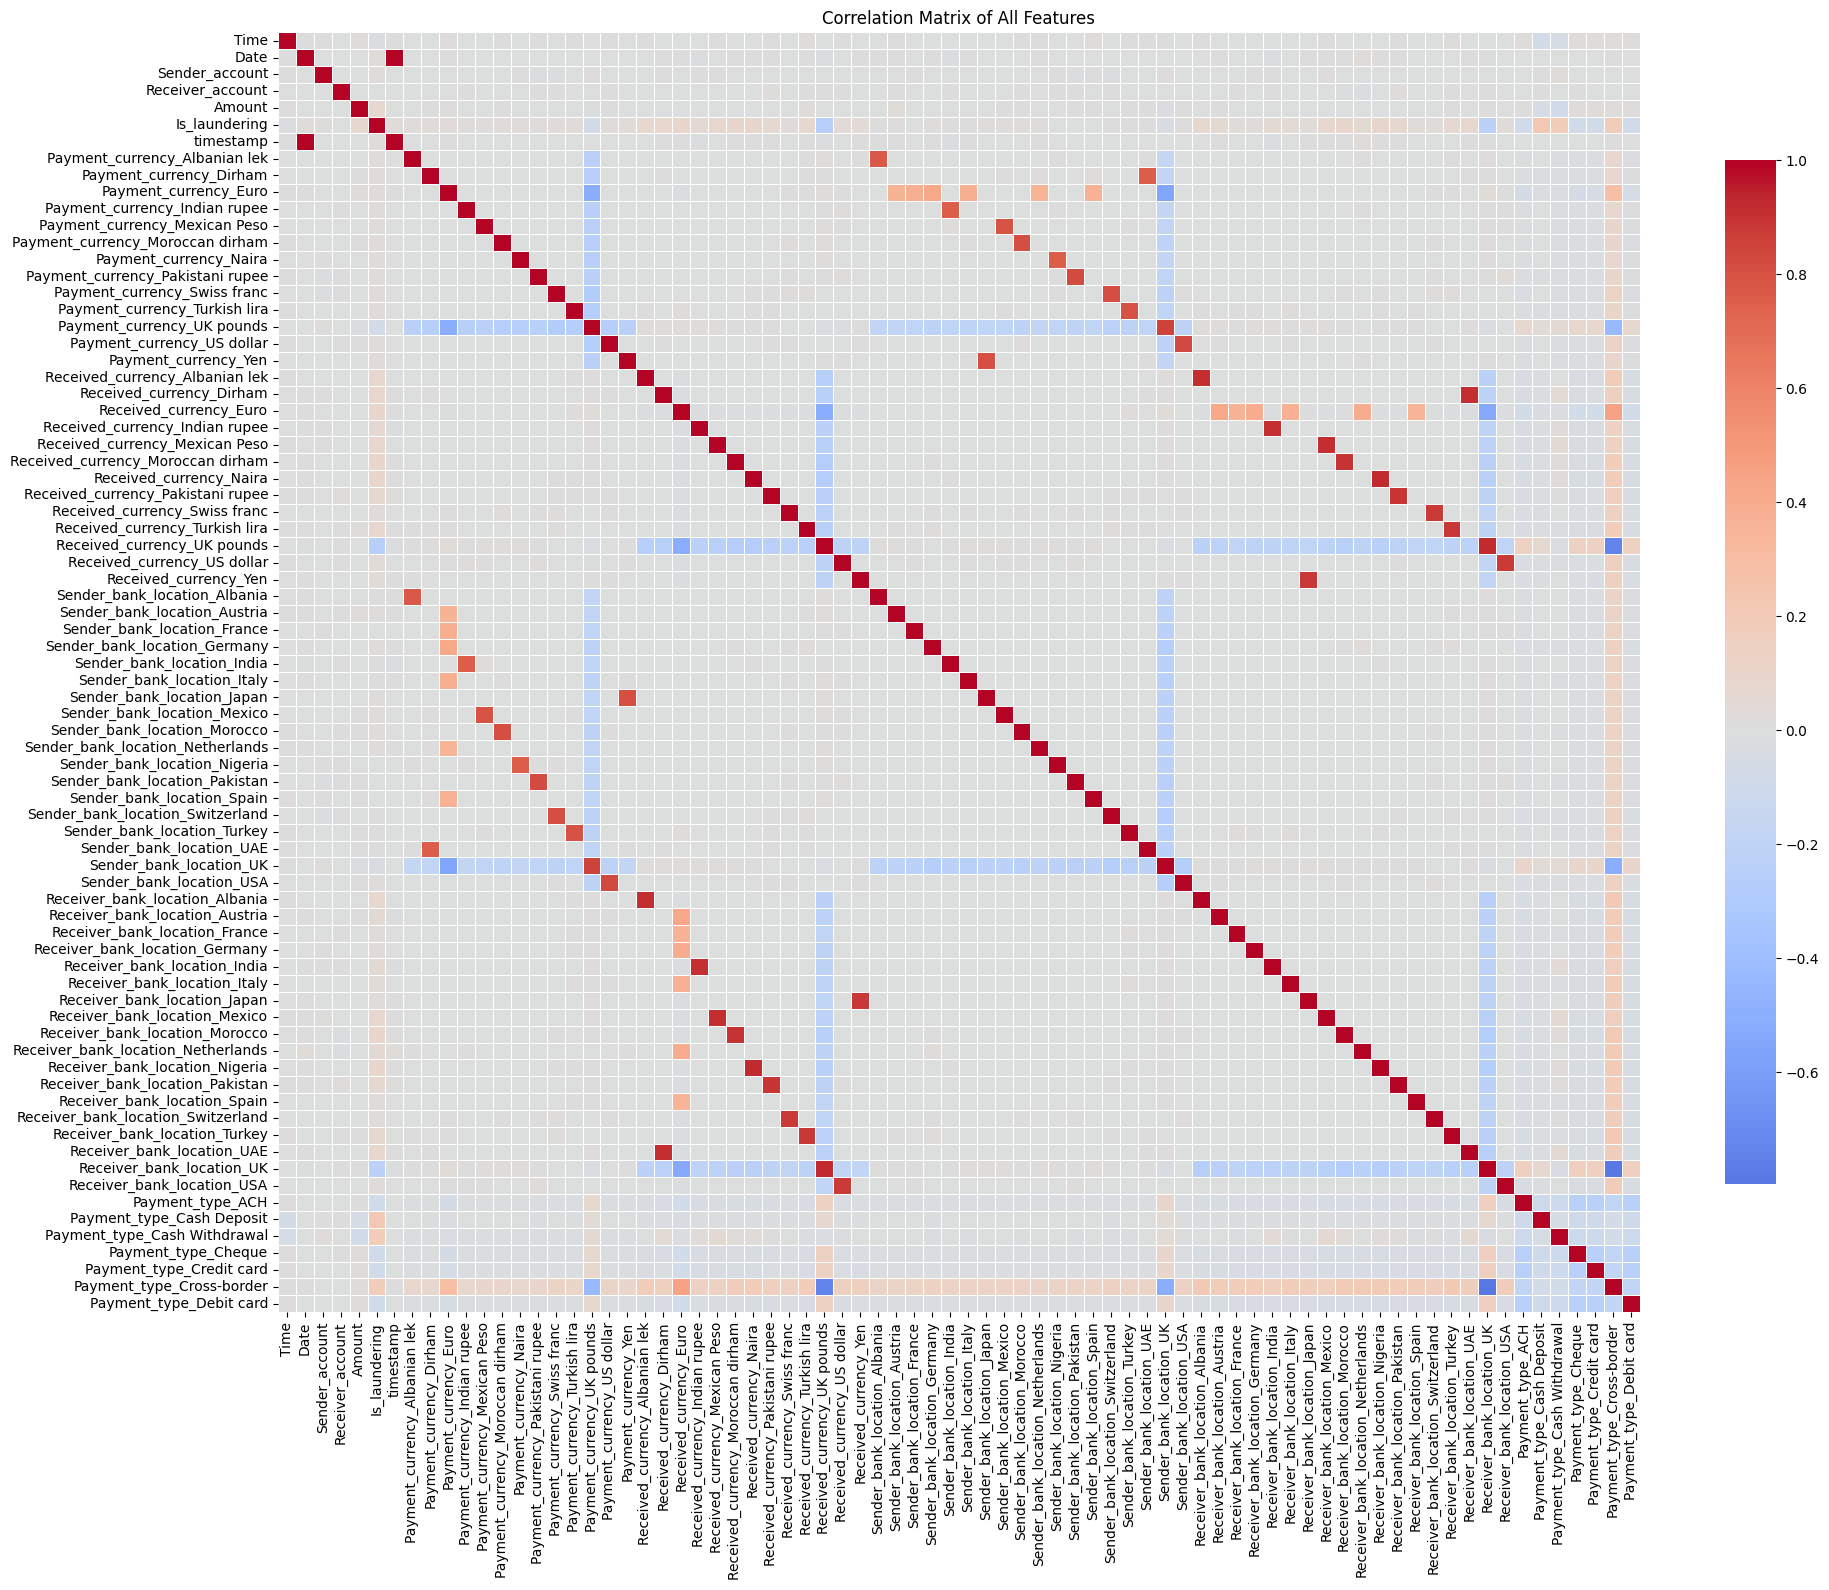

In [10]:
import seaborn as sns

# Correlation matrix for the cleaned dataframe
import matplotlib.pyplot as plt

corr_matrix = cleaned.corr()
print('Correlation matrix shape:', corr_matrix.shape)

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()